In [1]:
import os, sys
sys.path.insert(0, os.environ['PROJECT_PATH'])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap, Polygon

sns.set()
%matplotlib inline

In [3]:
from config.resources import path_to

In [4]:
path_to_data = path_to['filtered_data'].format('series_a', 'angel_group')
filtered_investments_df = pd.read_csv(path_to_data, encoding='latin1')

In [5]:
filtered_investments_df.columns

Index([u'funding_round_uuid', u'investor_uuid', u'is_lead_investor',
       u'investor_name', u'country_code_investors', u'state_code_investors',
       u'city_investors', u'investor_type', u'company_uuid',
       u'country_code_investees', u'state_code_investees', u'city_investees',
       u'investment_type', u'raised_amount_usd', u'latitude_investors',
       u'longitude_investors', u'confidence_investors', u'msa_name_investors',
       u'msa_code_investors', u'latitude_investees', u'longitude_investees',
       u'confidence_investees', u'msa_name_investees', u'msa_code_investees'],
      dtype='object')

In [6]:
incoming_investments_fields = ['company_uuid', 'city_investees', 'state_code_investees', 'latitude_investees', 'longitude_investees', 'msa_name_investees', 'msa_code_investees', 'raised_amount_usd' ]
incoming_investments_df = filtered_investments_df[ incoming_investments_fields ]
incoming_investments_df.head()

,company_uuid,city_investees,state_code_investees,latitude_investees,longitude_investees,msa_name_investees,msa_code_investees,raised_amount_usd
0,ff62df1f-c0d7-3d33-7531-22a507fffffc,Solon,OH,41.387119,-81.434402,"Cleveland-Elyria, OH Metro Area",17460.0,500000.0
1,52b1bf48-4441-b9e3-63af-1b098d7bc911,Cleveland,OH,41.504730,-81.690742,"Cleveland-Elyria, OH Metro Area",17460.0,3400000.0
2,55e56cd3-82d2-c782-4609-c1fcb2924e36,Cleveland,OH,41.504730,-81.690742,"Cleveland-Elyria, OH Metro Area",17460.0,2350000.0
3,7e66bb08-5d37-d5f7-c432-32c950893b9f,Cleveland,OH,41.504730,-81.690742,"Cleveland-Elyria, OH Metro Area",17460.0,NaN
4,fb77b550-5a58-a0be-eb32-80661325d5d7,Cleveland,OH,41.504730,-81.690742,"Cleveland-Elyria, OH Metro Area",17460.0,3500000.0


In [7]:
# drop rows with NaN values
incoming_investments_df = incoming_investments_df.dropna()

## Exploring nature of duplicate values

There is a possibility that rows with the same *company uuid* may have different *raised_amount_usd*, each corresponding to a different investor. So we group the data by *company uuid* and investigate the duplicate rows, so to speak

In [8]:
incoming_investments_by_company = incoming_investments_df.groupby('company_uuid')
incoming_investments_by_company.count().head()

,city_investees,state_code_investees,latitude_investees,longitude_investees,msa_name_investees,msa_code_investees,raised_amount_usd
company_uuid,,,,,,,
001e12da-151c-1cae-d898-4df437b5d99d,1,1,1,1,1,1,1
00bb6d80-f075-0edc-be0a-53159eb51721,1,1,1,1,1,1,1
0179a631-f3d3-60b3-fefb-fd440ec7e889,1,1,1,1,1,1,1
017ac29c-3ac0-b1fd-847e-ffe88c2a53b0,3,3,3,3,3,3,3
01ad1fd7-78bf-0c4b-c741-1e15f71e433a,3,3,3,3,3,3,3


Here we see that the company with *uuid* **017ac29c-3ac0-b1fd-847e-ffe88c2a53b0** has three entries.

In [9]:
incoming_investments_df[incoming_investments_df['company_uuid'] == '017ac29c-3ac0-b1fd-847e-ffe88c2a53b0']

,company_uuid,city_investees,state_code_investees,latitude_investees,longitude_investees,msa_name_investees,msa_code_investees,raised_amount_usd
583,017ac29c-3ac0-b1fd-847e-ffe88c2a53b0,Chicago,IL,41.884251,-87.632446,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",16980.0,3500000.0
587,017ac29c-3ac0-b1fd-847e-ffe88c2a53b0,Chicago,IL,41.884251,-87.632446,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",16980.0,3500000.0
592,017ac29c-3ac0-b1fd-847e-ffe88c2a53b0,Chicago,IL,41.884251,-87.632446,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",16980.0,3500000.0


Similarly for company with uuid **01ca71ee-1cd1-712e-aa38-69f8d395ab0f**

In [10]:
incoming_investments_df[incoming_investments_df['company_uuid'] == '01ca71ee-1cd1-712e-aa38-69f8d395ab0f']

,company_uuid,city_investees,state_code_investees,latitude_investees,longitude_investees,msa_name_investees,msa_code_investees,raised_amount_usd
1035,01ca71ee-1cd1-712e-aa38-69f8d395ab0f,Reston,VA,38.959679,-77.354538,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",47900.0,11000000.0
1038,01ca71ee-1cd1-712e-aa38-69f8d395ab0f,Reston,VA,38.959679,-77.354538,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",47900.0,11000000.0


Thus, we see that the *raised_amount_usd* refers simply to the amount raised by an individual company in a funding round, not within a single investment. Therefore it make sense to drop the duplicate rows for furthur exploration

In [11]:
# drop duplicate rows
incoming_investments_df = incoming_investments_df.drop_duplicates()

## Exploring by state

In [12]:
incoming_investments_by_state = incoming_investments_df.groupby('state_code_investees')

In [13]:
incoming_investments_by_state.describe()['raised_amount_usd'].head()

,count,mean,std,min,25%,50%,75%,max
state_code_investees,,,,,,,,
AR,1.0,5.000000e+06,NaN,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0
AZ,6.0,2.418833e+06,2.613279e+06,200000.0,1003250.0,1881500.0,2225000.0,7500000.0
CA,227.0,6.463337e+06,9.326315e+06,209000.0,1702895.0,4000000.0,7870000.0,102000000.0
CO,10.0,3.916838e+06,2.696323e+06,750000.0,1537500.0,3585000.0,6349594.0,7700000.0
CT,7.0,1.051000e+07,1.331112e+07,2370000.0,3800000.0,5000000.0,9300000.0,40000000.0


In [16]:
incoming_investments_mean_by_state = incoming_investments_by_state.mean()
incoming_investments_count_by_state = incoming_investments_by_state.size()
incoming_investments_raised_value_mean = incoming_investments_mean_by_state['raised_amount_usd'] / 1000000

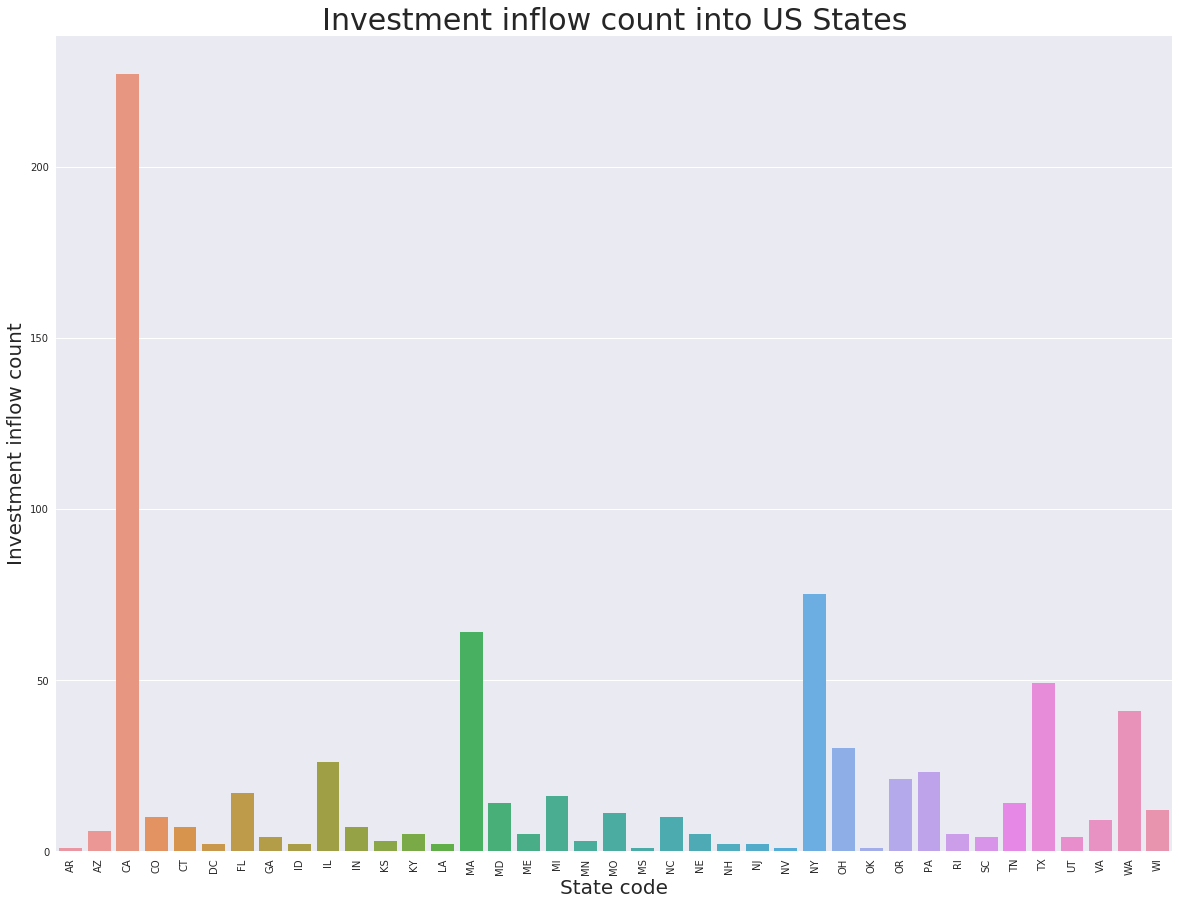

In [18]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=incoming_investments_mean_by_state.index, y=incoming_investments_count_by_state, 
              data=incoming_investments_mean_by_state)
ax.axes.set_title("Investment inflow count into US States",fontsize=30)
ax.set_xlabel("State code",fontsize=20)
ax.set_ylabel("Investment inflow count",fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
print

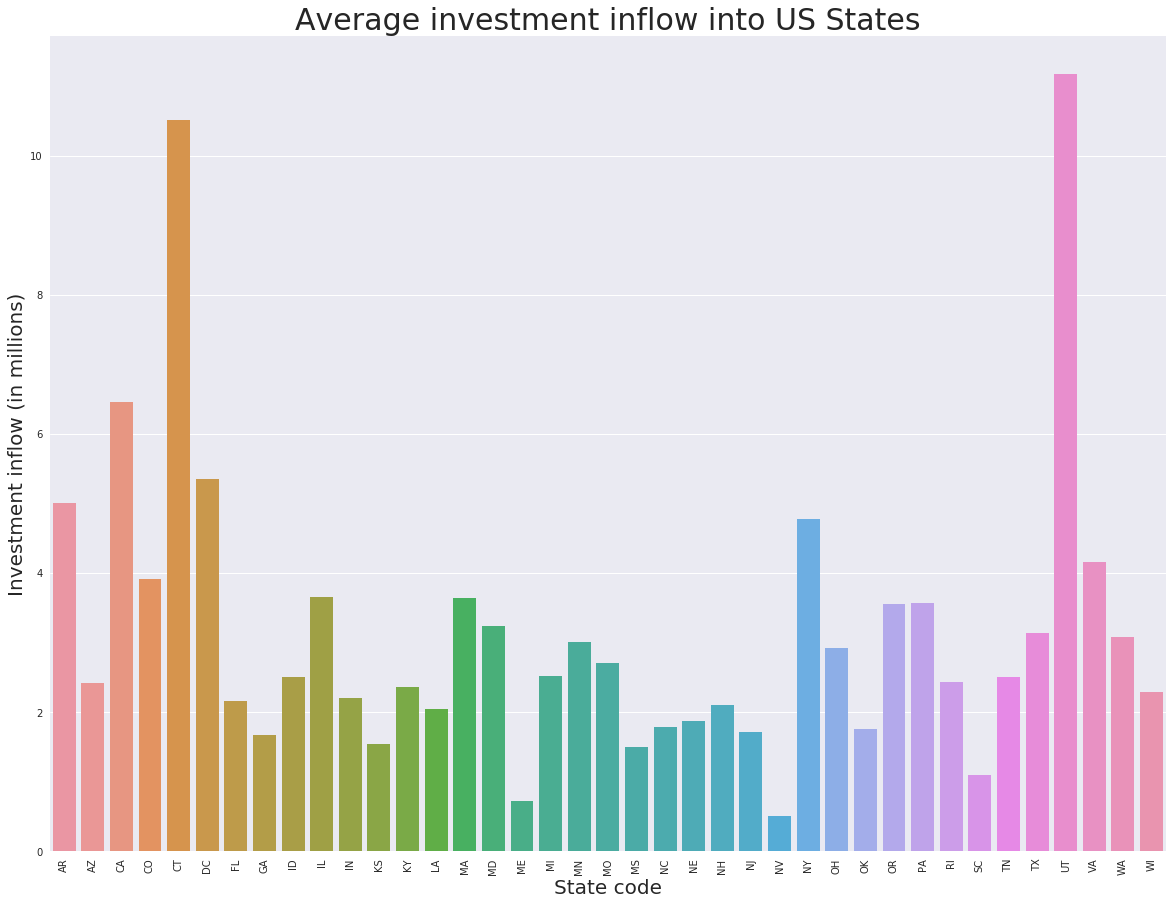

In [20]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=incoming_investments_mean_by_state.index, y=incoming_investments_raised_value_mean, 
              data=incoming_investments_mean_by_state)
ax.axes.set_title("Average investment inflow into US States",fontsize=30)
ax.set_xlabel("State code",fontsize=20)
ax.set_ylabel("Investment inflow (in millions)",fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
print

In [21]:
incoming_investments_by_msa = incoming_investments_df.groupby('msa_name_investees')

In [22]:
incoming_investments_by_msa.describe()['raised_amount_usd'].head()

,count,mean,std,min,25%,50%,75%,max
msa_name_investees,,,,,,,,
"Akron, OH Metro Area",1.0,3.100000e+06,NaN,3100000.0,3100000.0,3100000.0,3100000.0,3100000.0
"Ann Arbor, MI Metro Area",7.0,2.930000e+06,1.861711e+06,700000.0,1780000.0,2000000.0,4125000.0,6000000.0
"Atlanta-Sandy Springs-Roswell, GA Metro Area",4.0,1.675000e+06,7.675719e+05,800000.0,1175000.0,1700000.0,2200000.0,2500000.0
"Austin-Round Rock, TX Metro Area",28.0,4.656500e+06,9.465554e+06,100000.0,338750.0,1500000.0,5375000.0,49000000.0
"Bakersfield, CA Metro Area",1.0,1.500000e+06,NaN,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0


In [23]:
incoming_investments_mean_by_msa = incoming_investments_by_msa.mean()
incoming_investments_count_by_msa = incoming_investments_by_msa.size()
incoming_investments_raised_value_mean = incoming_investments_mean_by_msa['raised_amount_usd'] / 1000000

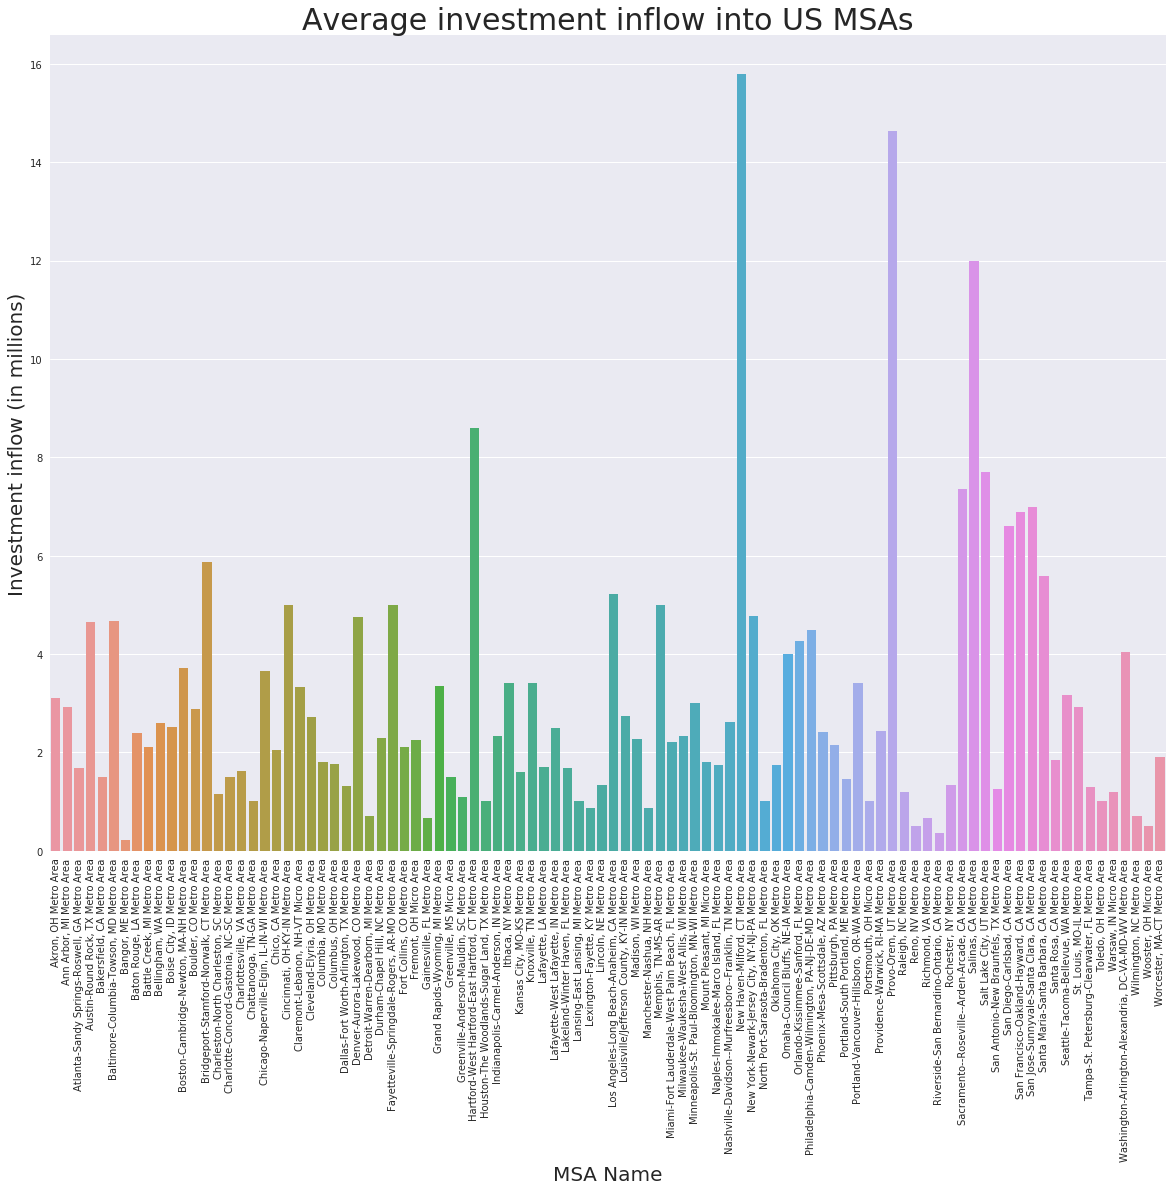

In [25]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=incoming_investments_mean_by_msa.index, y=incoming_investments_raised_value_mean, 
              data=incoming_investments_mean_by_msa)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.axes.set_title("Average investment inflow into US MSAs",fontsize=30)
ax.set_xlabel("MSA Name",fontsize=20)
ax.set_ylabel("Investment inflow (in millions)",fontsize=20)
print

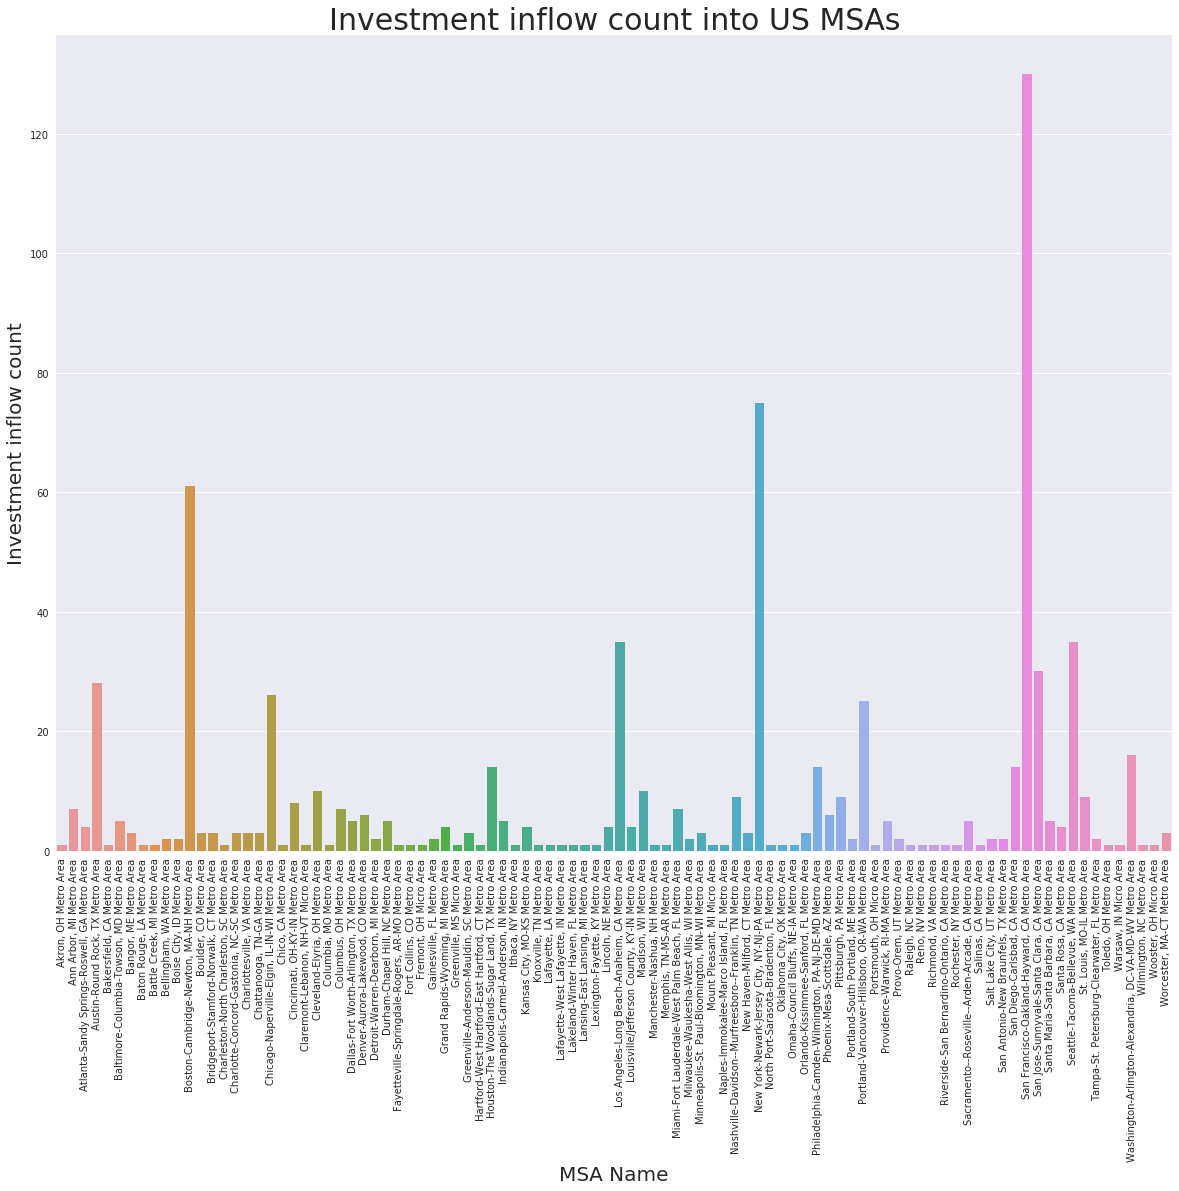

In [24]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=incoming_investments_mean_by_msa.index, y=incoming_investments_count_by_msa, 
              data=incoming_investments_mean_by_msa)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.axes.set_title("Investment inflow count into US MSAs",fontsize=30)
ax.set_xlabel("MSA Name",fontsize=20)
ax.set_ylabel("Investment inflow count",fontsize=20)
print

In [33]:
incoming_investments_loc_df = incoming_investments_df[ ['latitude_investees', 'longitude_investees', 'raised_amount_usd'] ]
lon = incoming_investments_loc_df['longitude_investees'].tolist()
lat = incoming_investments_loc_df['latitude_investees'].tolist()

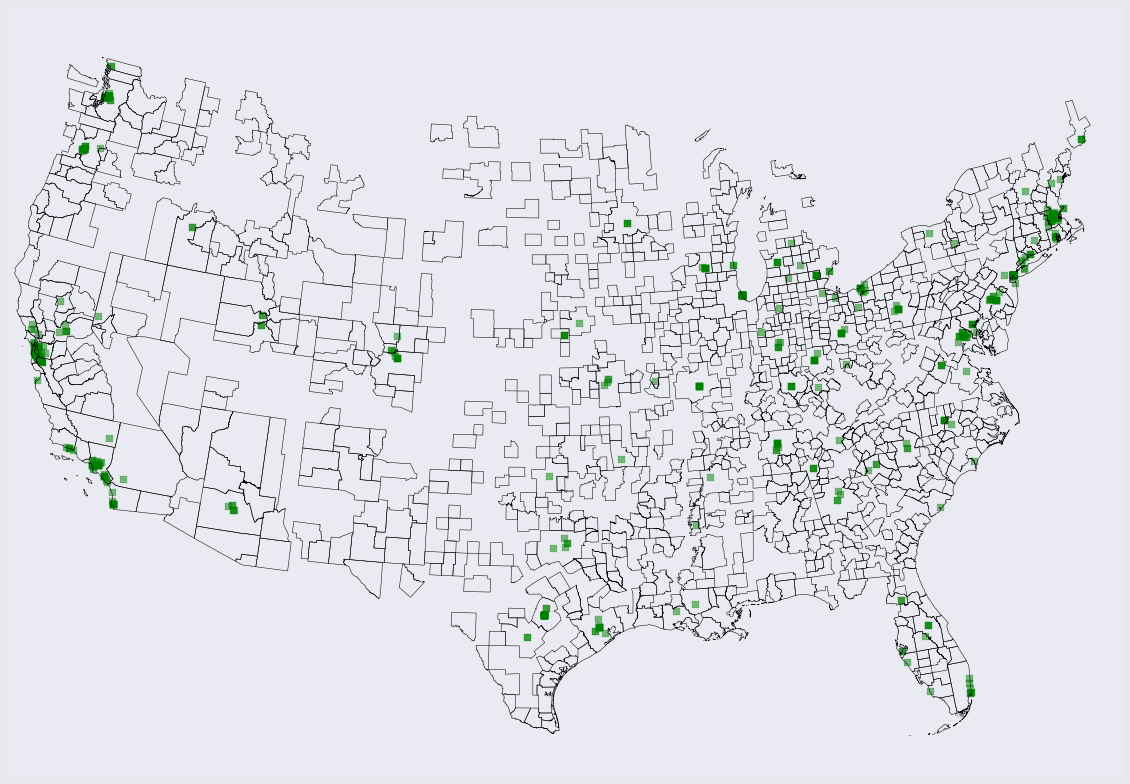

In [34]:
plt.ioff()
fig = plt.figure(figsize=(20,15))
m = Basemap(urcrnrlat=49.0,     # top
            urcrnrlon=-64.0,   # bottom
            llcrnrlat=22.0,     # left
            llcrnrlon=-119.0,   # right
            projection='lcc',
            lat_1=39,
            lon_0=-98
            )
fig.patch.set_facecolor('#e6e8ec')
m.readshapefile(path_to['shape_files'], 'msa', drawbounds=True)
x, y = m(lon, lat)
m.scatter(x, y, c='g', alpha=0.5, marker='s')
plt.show()